## CS-E4820 Machine Learning: Advanced Probabilistic Methods (spring 2022)

Pekka Marttinen, Prayag Tiwari, Vishnu Raj, Tianyu Cui, Yogesh Kumar, Antti Pöllänen, Louis Filstroff, Alex Aushev, Zheyang Shen, Nikitin Alexander , Sebastiaan De Peuter.

## Exercise 5, due on Tuesday March 8 at 23:50.

### Contents
1. Problem 1: EM for missing observations
2. Problem 2: Extension of 'simple example' from the lecture
3. Problem 3: PyTorch

# Problem 1: EM for missing observations
Suppose random variables $X_{i}$ follow a bivariate normal distribution $X_{i}\sim \mathcal{N}_{2}(0,\Sigma)$, where
$ \Sigma = \begin{bmatrix} 1 & \rho\\ \rho & 1 \end{bmatrix} $.

Suppose further that we have observations on $X_{1}=(X_{11},X_{12})^{T}$, $X_{2}=(X_{21},X_{22})^{T}$ and $X_{3}=(X_{31},X_{32})^{T}$, such that
$X_{1}$ and $X_{3}$ are fully observed, and from $X_{2}$ we have observed only
the second coordinate. Thus, our data matrix can be written as

$$
\begin{bmatrix}
x_{11} & x_{12}\\
? & x_{22}\\
x_{31} & x_{32}
\end{bmatrix} 
$$


where the rows correspond to the transposed observations $\mathbf{x}_{1}^{T},\mathbf{x}_{2}^{T},\mathbf{x}_{3}^{T}$. Suppose we want to learn the unknown parameter $\rho$ using the EM-algorithm. Denote the missing observation by $Z$ and derive the E-step of the algorithm, i.e., __(a)__ write the complete data log-likelihood $\ell(\rho)$, __(b)__ compute the posterior distribution of the missing observation, given the observed variables and current estimate for $\rho$, and __(c)__ evaluate the expectation of $\ell(\rho)$ with respect to the posterior distribution of the missing observations.

**Hints**:

1. In general, for $X \sim \mathcal{N}_2(\boldsymbol{\mu},\boldsymbol{\Sigma})$, where $X=(X_1, X_2)^{T}$, $\boldsymbol{\mu}=(\mu_1, \mu_2)^{T}$ and $\boldsymbol{\Sigma} = \begin{pmatrix} 
            \sigma_1^{2} & \rho\sigma_{1}\sigma_{2} \\ 
            \rho\sigma_{1}\sigma_{2} & \sigma_2^{2} 
            \end{pmatrix}$, 
we have 
$$ X_1 \mid X_2 = x_2 \sim \mathcal{N}\left(\mu_1 + \frac{\sigma_1}{\sigma_2}\rho(x_2-\mu_2), (1-\rho^2)\sigma_1^{2}\right),$$  with $\rho$ being the correlation coefficient.
2. For evaluating the expectation of $\ell(\rho)$, you can make use of the following two rules: 
    - $\mathbf{x_2}^T \boldsymbol{\Sigma}^{-1} \mathbf{x_2} = trace(\boldsymbol{\Sigma}^{-1}\mathbf{x_2x_2^T}).$
    - if $X \sim \mathcal{N}(\mu, \sigma^2)$ then $\langle{X^2}\rangle = \mu^2 + \sigma^2$.




![](as5ex1p1.jpg)

![](as5ex1p2.jpg)

# Problem 2: Extension of 'simple example' from the lecture
Suppose that we have $N$ independent observations $x = ( x_1, \dots, x_N )$ from a two-component mixture of univariate Gaussian distributions with unknown mixing co-efficients and unknown mean of the second component:
$$ p(x_{n} \mid \theta,\tau)=(1-\tau)\mathcal{N}(x_{n}|0,1)+\tau\mathcal{N}(x_{n} \mid \theta,1).$$

**(a)** Write down the complete data log-likelihood and derive the EM-algorithm for learning the maximum likelihood estimates for $\theta$ and $\tau$. 

**(b)** Simulate some data from the model ($N = 100$ samples) with the true values of parameters $\theta$ = 3 and $\tau = 0.5$. Run your EM algorithm to see whether the learned parameters converge close to the true values (by e.g. just listing the estimates from a few iterations or plotting them). Use the code template below (after the answer cell) as a starting point. 

**HINT**: The E and M steps for simple example.pdf from the lecture material looks as follows
```Python
	# E-step: compute the responsibilities r2 for component 2
	r1_unnorm = scipy.stats.norm.pdf(x, 0, 1)
	r2_unnorm = scipy.stats.norm.pdf(x, theta_0, 1)
	r2 = r2_unnorm / (r1_unnorm + r2_unnorm)
	
	# M-step: compute the parameter value that maximizes
	# the expectation of the complete-data log-likelihood.
	theta[it] = sum(r2 * x) / sum(r2)
```






![](as5ex2p1.jpg)

![](as5ex2p2.jpg)

theta       tau
1.0000000  0.1000000
3.2393002  0.3798055
3.2787207  0.5396835
3.2208416  0.5618515
3.2012856  0.5684228
3.1949151  0.5705275
3.1928396  0.5712102
3.1921631  0.5714324
3.1919426  0.5715048
3.1918707  0.5715284
3.1918472  0.5715361
3.1918396  0.5715386
3.1918371  0.5715394
3.1918363  0.5715397
3.1918360  0.5715397
3.1918359  0.5715398
3.1918359  0.5715398
3.1918359  0.5715398
3.1918359  0.5715398
3.1918359  0.5715398


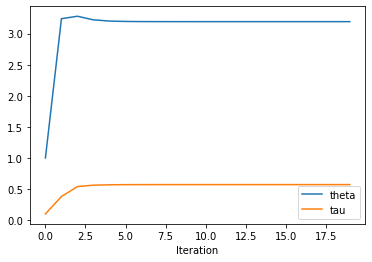

In [10]:
# template for Problem 2(b)
import numpy as np
import scipy.stats
from scipy.stats import norm
import matplotlib.pyplot as plt


### Simulate data:

np.random.seed(0)

theta_true = 3
tau_true = 0.5
n_samples = 100

x = np.zeros(n_samples)
for i in range(n_samples):
    # Sample from N(0,1) or N(theta_true,1)
    if np.random.rand() < 1 - tau_true:
        x[i] = np.random.normal(0, 1)
    else:
        x[i] = np.random.normal(theta_true, 1)


### The EM algorithm:

n_iter = 20
theta = np.zeros(n_iter)
tau = np.zeros(n_iter)

# Initial guesses for theta and tau
theta[0] = 1
tau[0] = 0.1

for it in range(1, n_iter):
    # The current estimates for theta and tau,
    # computed in the previous iteration
    theta_0 = theta[it-1]
    tau_0 = tau[it-1]

    # E-step: compute the responsibilities r1 and r2
    r2 = tau_0 * norm.pdf(x, theta_0, 1) / (tau_0 * norm.pdf(x, theta_0, 1) + (1 - tau_0) * norm.pdf(x, 0, 1))
    r1 = 1 - r2
    
    
    #E = r1*np.log((1 - tau_0) * norm.pdf(x, 0, 1)) 
    #    + r2 * tau_0 * norm.pdf(x, theta_0, 1)

    # M-step: compute the parameter values that maximize
    # the expectation of the complete-data log-likelihood.
    N2 = np.sum(r2)
    theta[it] = 1/N2 * np.sum(r2 * x)
    tau[it] = N2/n_samples
    
    
    

# Print and plot the values of theta and tau in each iteration
print("theta       tau")
for theta_i, tau_i in zip(theta, tau):
    print("{0:.7f}  {1:.7f}".format(theta_i, tau_i))

plt.plot(range(n_iter), theta, label = 'theta')
plt.plot(range(n_iter), tau, label = 'tau')
plt.xlabel('Iteration')
plt.legend()
plt.show()

### Problem 3: PyTorch
Go through the PyTorch tutorials in the three links and answer the questions given below

1) What is PyTorch: https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py

2) Autograd: https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py

3) Linear regression with PyTorch: https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/linear_regression/main.py

__(a)__ What are PyTorch Tensors and how do you run a CPU tensor on GPU? 


__(b)__ What is Automatic differentiation and autograd? 


__(c)__ PyTorch constructs the computation graph dynamically as the operations are defined. In the 'linear regression with PyTorch' tutorial which line numbers indicates the completion of the computation graph, computation of the gradients and update of the weights, respectively? 



Write your answer to Problem 3 here.

### a) 

PyTorch tensors are very similar to array and matrice implementations in other programming languages (such as numpy ndarray in python). They are just build so that they can be used by specialized hardware such as gpus. Typically changing the running environment from cpu to gpu is very simple with to("cuda") method applied to each tensor, so that every operation done on them will be performed using gpu. 

### b)

Automatic differentiation exploits the fact that every computer program, no matter how complicated, executes a sequence of elementary arithmetic operations (addition, subtraction, multiplication, division, etc.) and elementary functions (exp, log, sin, cos, etc.) [Wikipedia].

Autograd is Pytorch implementation of automatic differentiation. Tensors can be set to keep track of the gradient while doing operations with them. Using chain rule and accumulating the gradient, the gradient can be propagated to all tensors being part of the network.



### c)


line number for:

completion of the computation graph: line 23

computation of gradients: line 41

update of the weights: line 42 

Epoch [5/60], Loss: 38.2995
Epoch [10/60], Loss: 15.7122
Epoch [15/60], Loss: 6.5615
Epoch [20/60], Loss: 2.8542
Epoch [25/60], Loss: 1.3520
Epoch [30/60], Loss: 0.7432
Epoch [35/60], Loss: 0.4964
Epoch [40/60], Loss: 0.3961
Epoch [45/60], Loss: 0.3553
Epoch [50/60], Loss: 0.3385
Epoch [55/60], Loss: 0.3314
Epoch [60/60], Loss: 0.3283


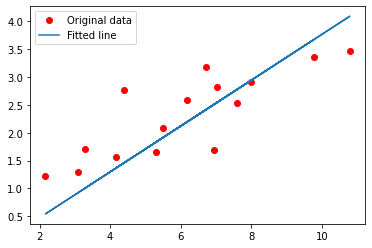

In [11]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# Linear regression model
model = nn.Linear(input_size, output_size) # completion of computation graph

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward() # computation of gradients
    optimizer.step() # update of the weights
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')